In [1]:
import seaborn as sns; sns.set_theme()
%load_ext autoreload
%autoreload 2

from churn_library import import_data

/home/oliver/anaconda3/envs/aind/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
import os
os.environ['QT_QPA_PLATFORM']='offscreen'

In [3]:
# Step 1: Load Data
df = import_data('./data/bank_data.csv')
df.head()

,Unnamed: 0,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [4]:
df.shape

(10127, 22)

In [5]:
df.isnull().sum()

Unnamed: 0                  0
CLIENTNUM                   0
Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

In [6]:
df.describe()

,Unnamed: 0,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,10127.000000,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,5063.000000,7.391776e+08,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,2923.557422,3.690378e+07,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,0.000000,7.080821e+08,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,2531.500000,7.130368e+08,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,5063.000000,7.179264e+08,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,7594.500000,7.731435e+08,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,10126.000000,8.283431e+08,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000


In [7]:
%load_ext autoreload
%autoreload 2

from churn_library import perform_eda, perform_feature_engineering, train_models

# Step 2: Perform EDA
perform_eda(df)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Displaying: 1_churn_histogram.png


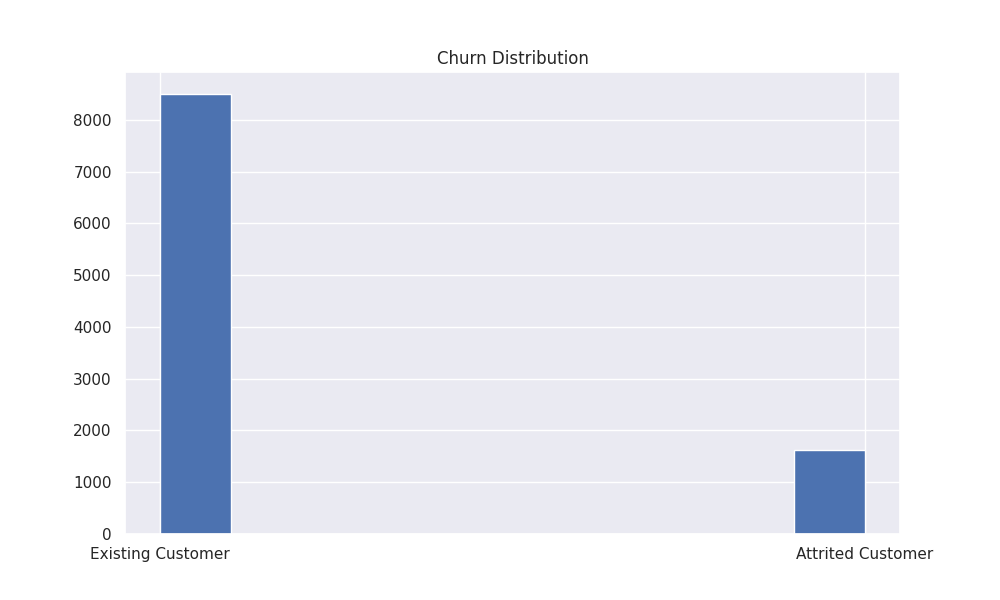

Displaying: 2_total_trans_ct_histplot.png


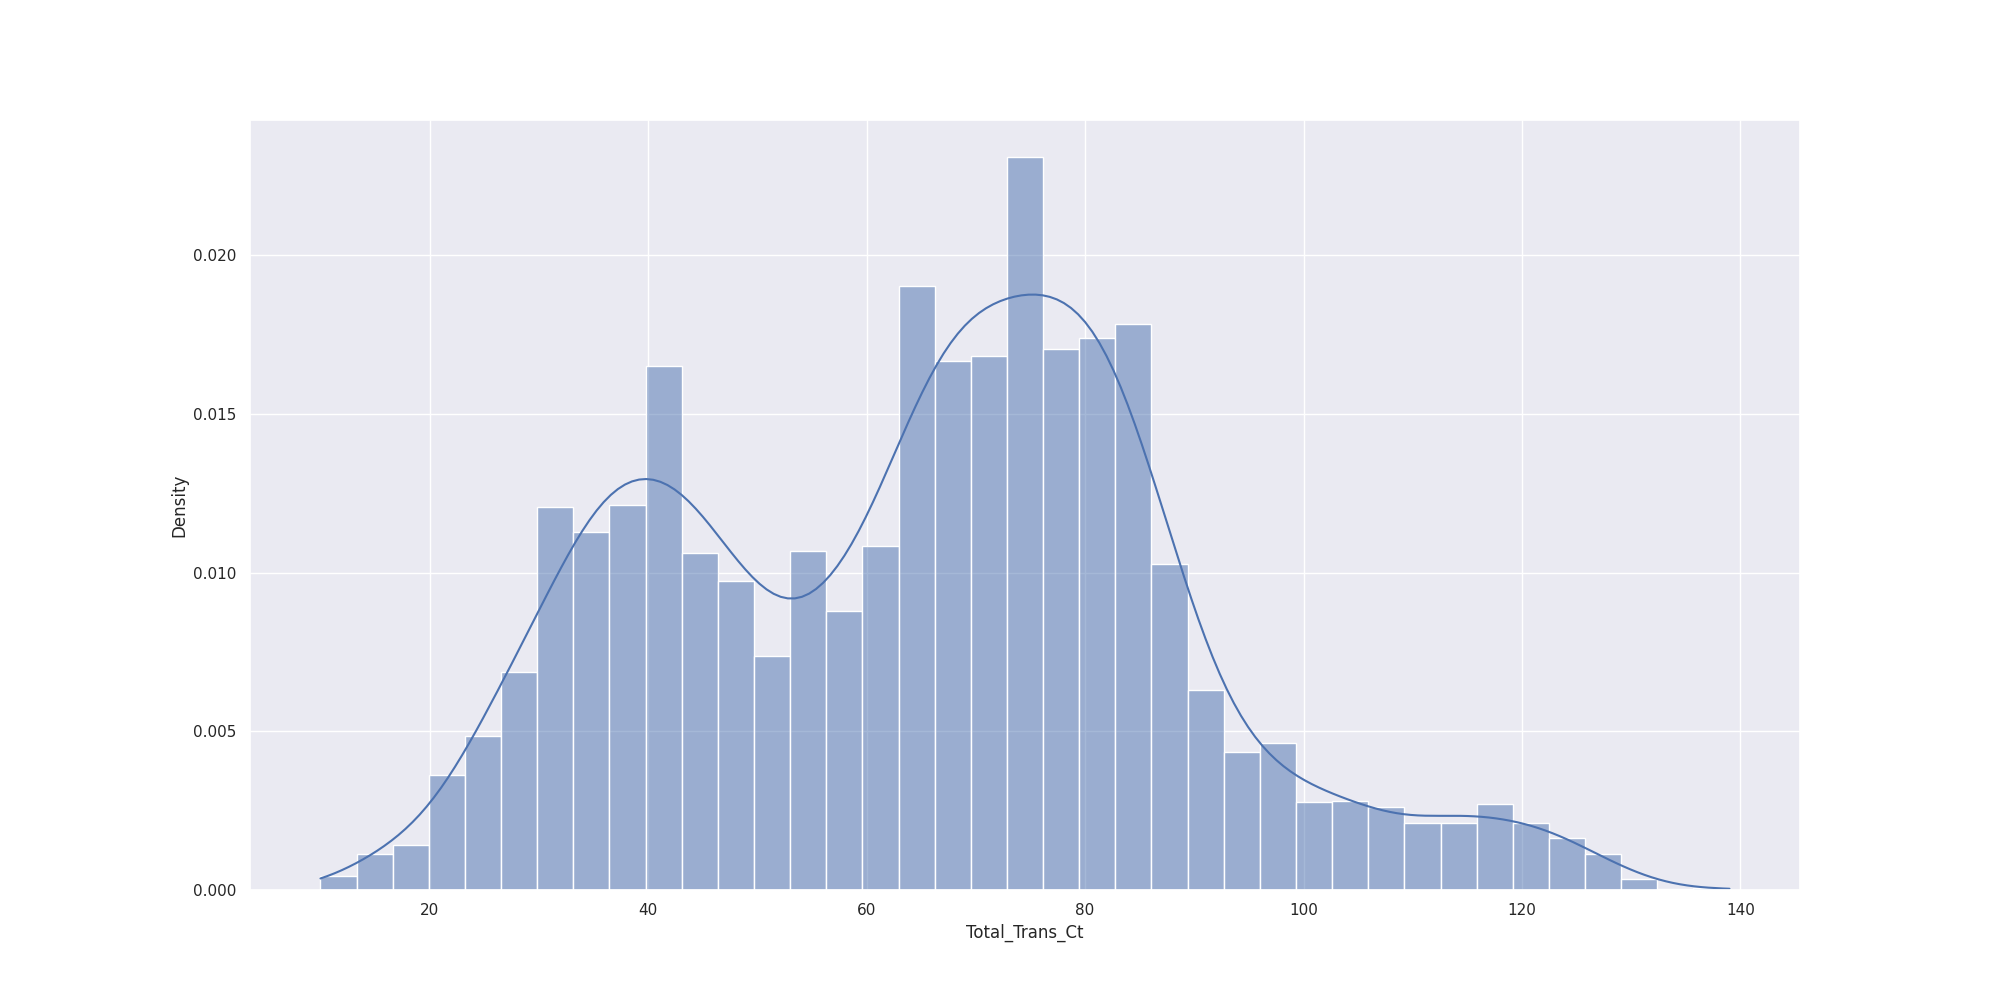

Displaying: 3_customer_age_histogram.png


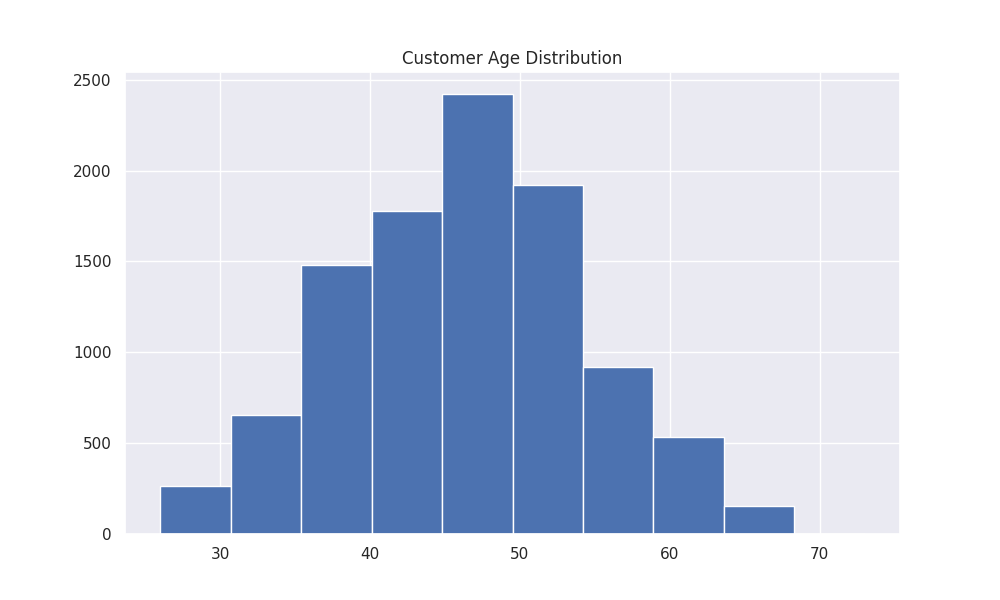

Displaying: 4_marital_status_distribution.png


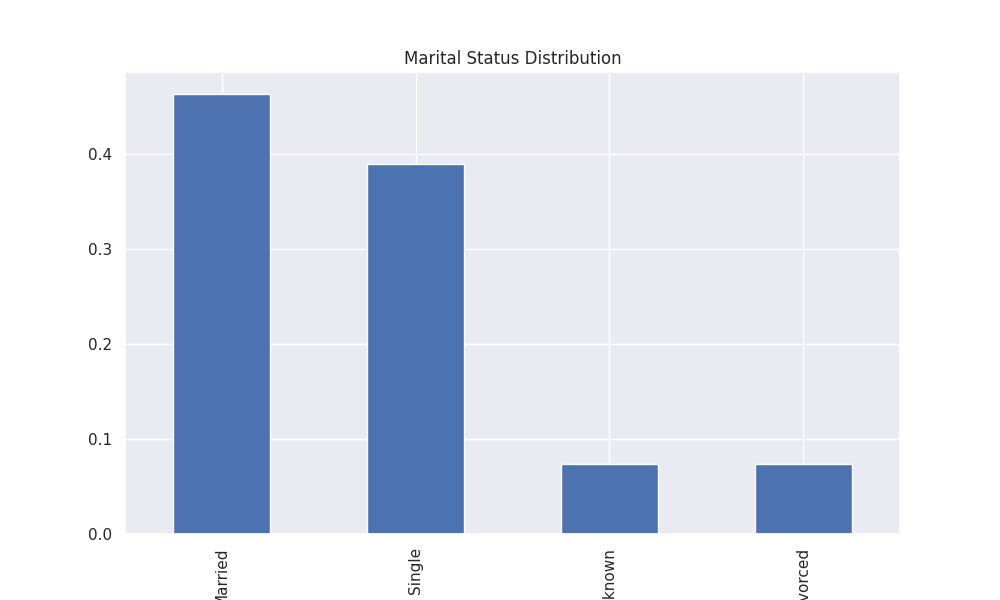

Displaying: 5_correlation_heatmap.png


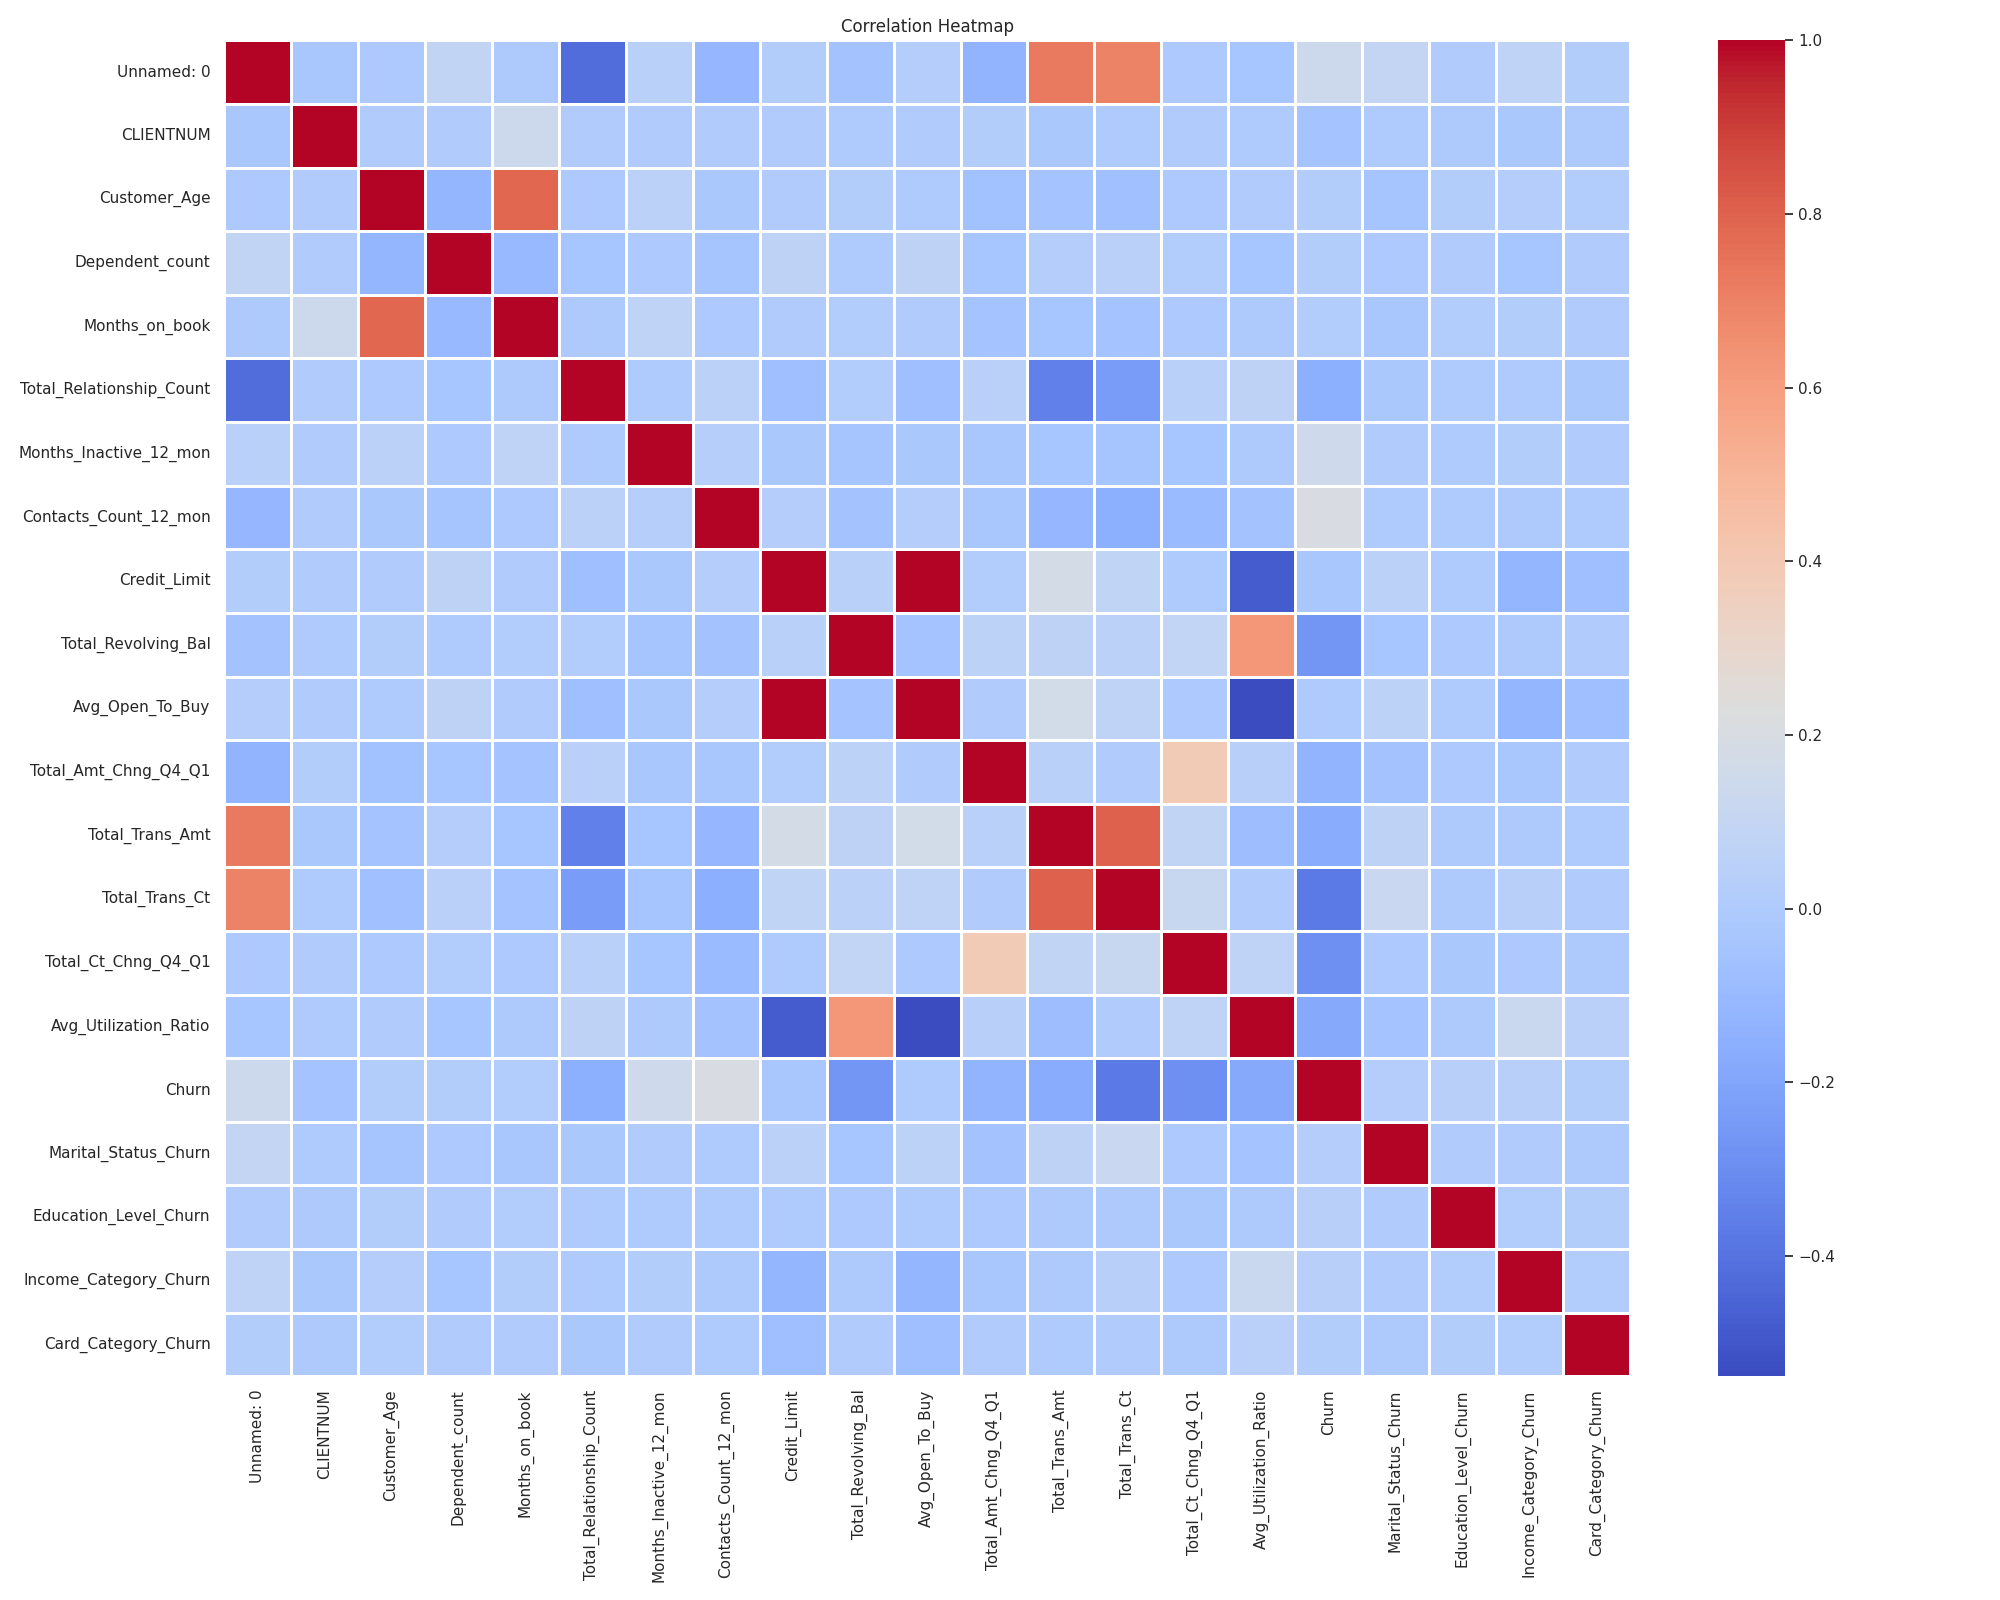

In [8]:
from IPython.display import Image, display

# Directory containing the EDA images
eda_images_path = './images/eda'

for file_name in sorted(os.listdir(eda_images_path)):  # Use sorted() to order filenames
    if file_name.endswith(('.png', '.jpg', '.jpeg')):  # Check for image files
        file_path = os.path.join(eda_images_path, file_name)
        print(f"Displaying: {file_name}")
        display(Image(filename=file_path))

In [9]:
# Step: Feature Engineering
X_train, X_test, y_train, y_test = perform_feature_engineering(df, response='Churn')

In [10]:
X_train.head()

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Gender_Churn,Education_Level_Churn,Marital_Status_Churn,Income_Category_Churn,Card_Category_Churn
415,49,2,38,3,2,0,8077.0,1965,6112.0,0.637,1329,26,0.444,0.243,0.146152,0.178295,0.151269,0.134807,0.160979
3749,61,0,51,4,2,2,8476.0,0,8476.0,0.675,3889,67,0.489,0.000,0.173572,0.152012,0.169414,0.168165,0.160979
9295,27,0,19,1,1,3,34516.0,1131,33385.0,0.715,14716,112,0.750,0.033,0.146152,0.152024,0.172230,0.157655,0.147748
8290,52,1,36,1,1,3,3040.0,2517,523.0,0.774,4608,61,1.033,0.828,0.173572,0.168532,0.151269,0.171862,0.160979
7672,44,3,36,2,3,3,2228.0,0,2228.0,0.686,2523,45,0.607,0.000,0.173572,0.152012,0.169414,0.171862,0.160979


In [11]:
y_train.head()

415     0
3749    0
9295    0
8290    0
7672    1
Name: Churn, dtype: int64

In [12]:
# Step 5: Train Models
train_models(X_train, X_test, y_train, y_test)

/home/oliver/anaconda3/envs/aind/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
60 fits failed out of a total of 120.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
60 fits failed with the following error:
Traceback (most recent call last):
  File "/home/oliver/anaconda3/envs/aind/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/oliver/anaconda3/envs/aind/lib/python3.9/site-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/home/oliver/anaconda3/envs/aind/lib/python3.9/site-packages/sklearn/base.py", line 666, in _validate_params
    validate_p

Displaying: 0_lr_train_report.png


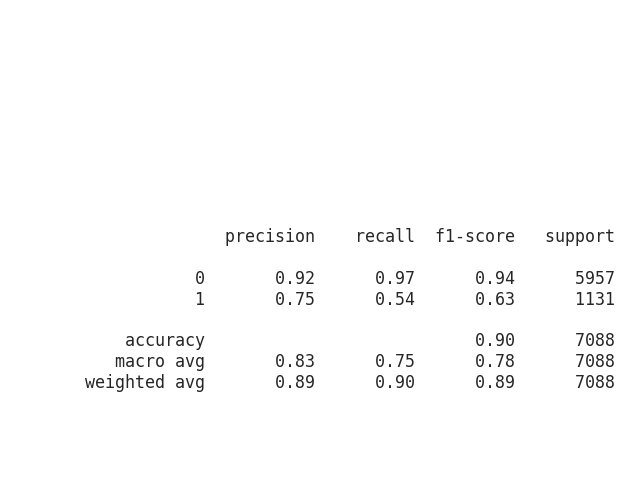

Displaying: 1_lr_test_report.png


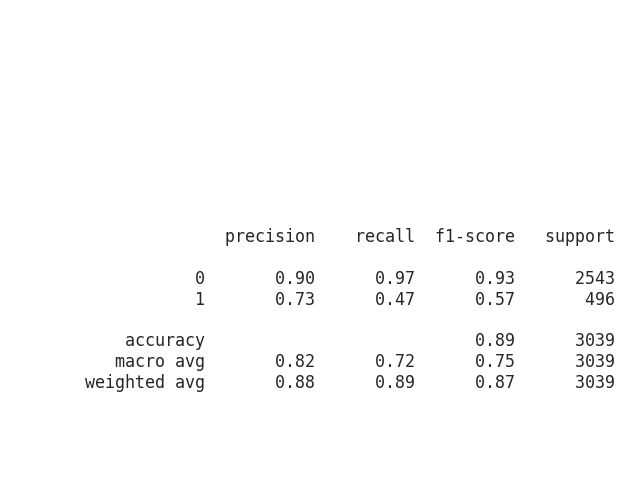

Displaying: 2_rf_train_report.png


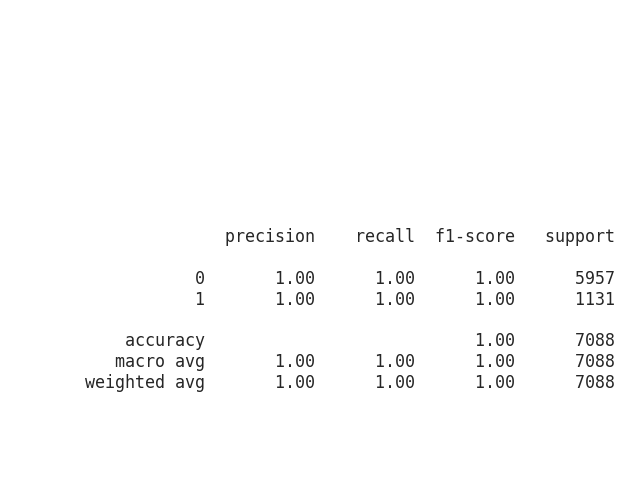

Displaying: 3_rf_test_report.png


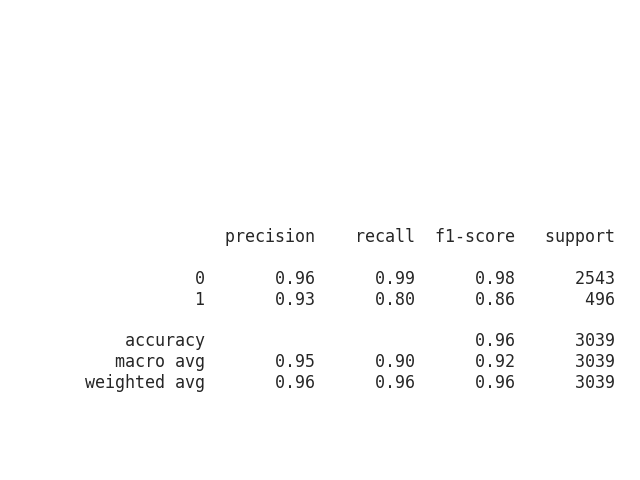

Displaying: 5_roc_curve_lrc.png


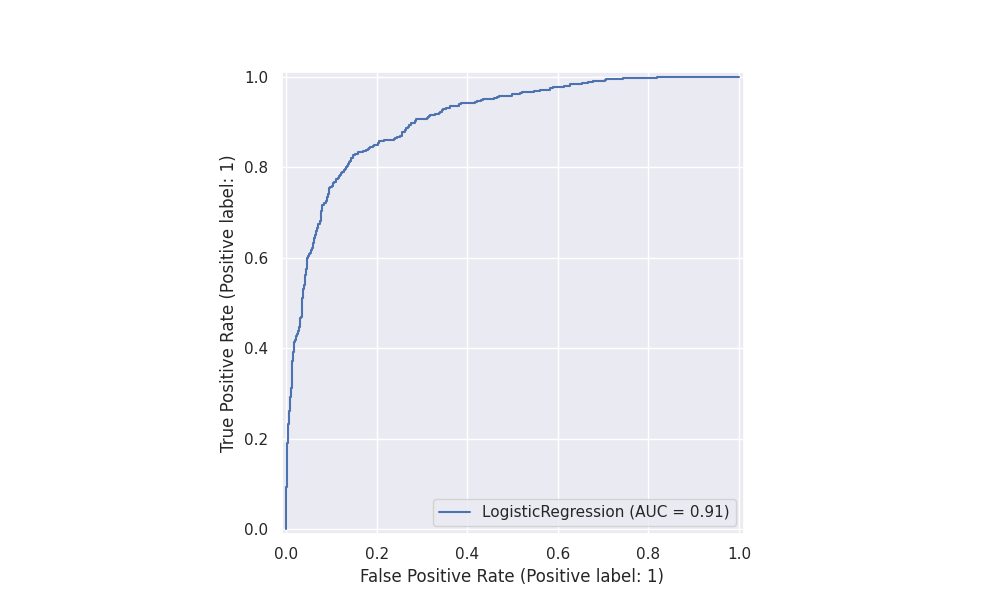

Displaying: 6_roc_curves_rfc.png


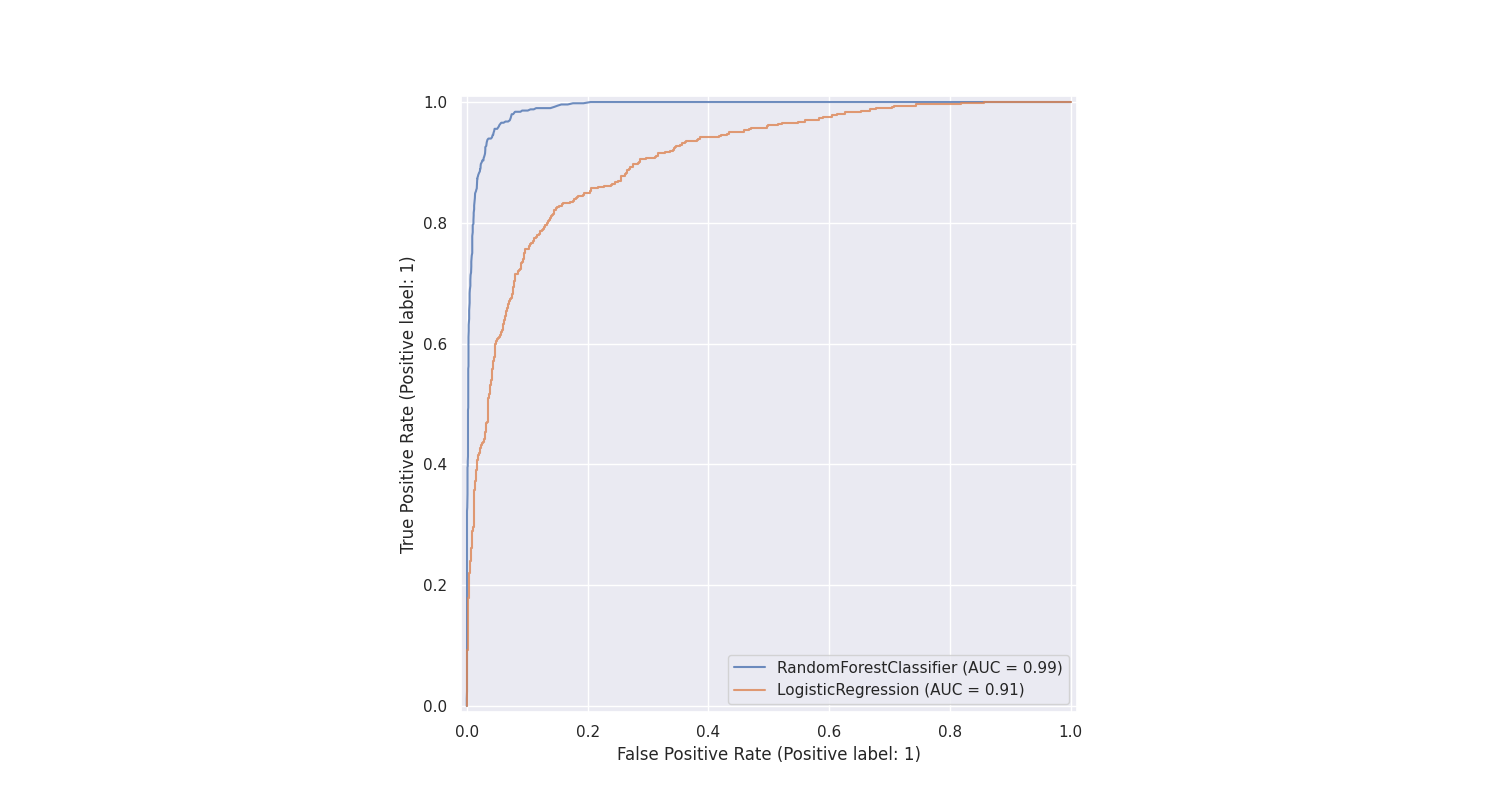

Displaying: 7_feature_importances.png


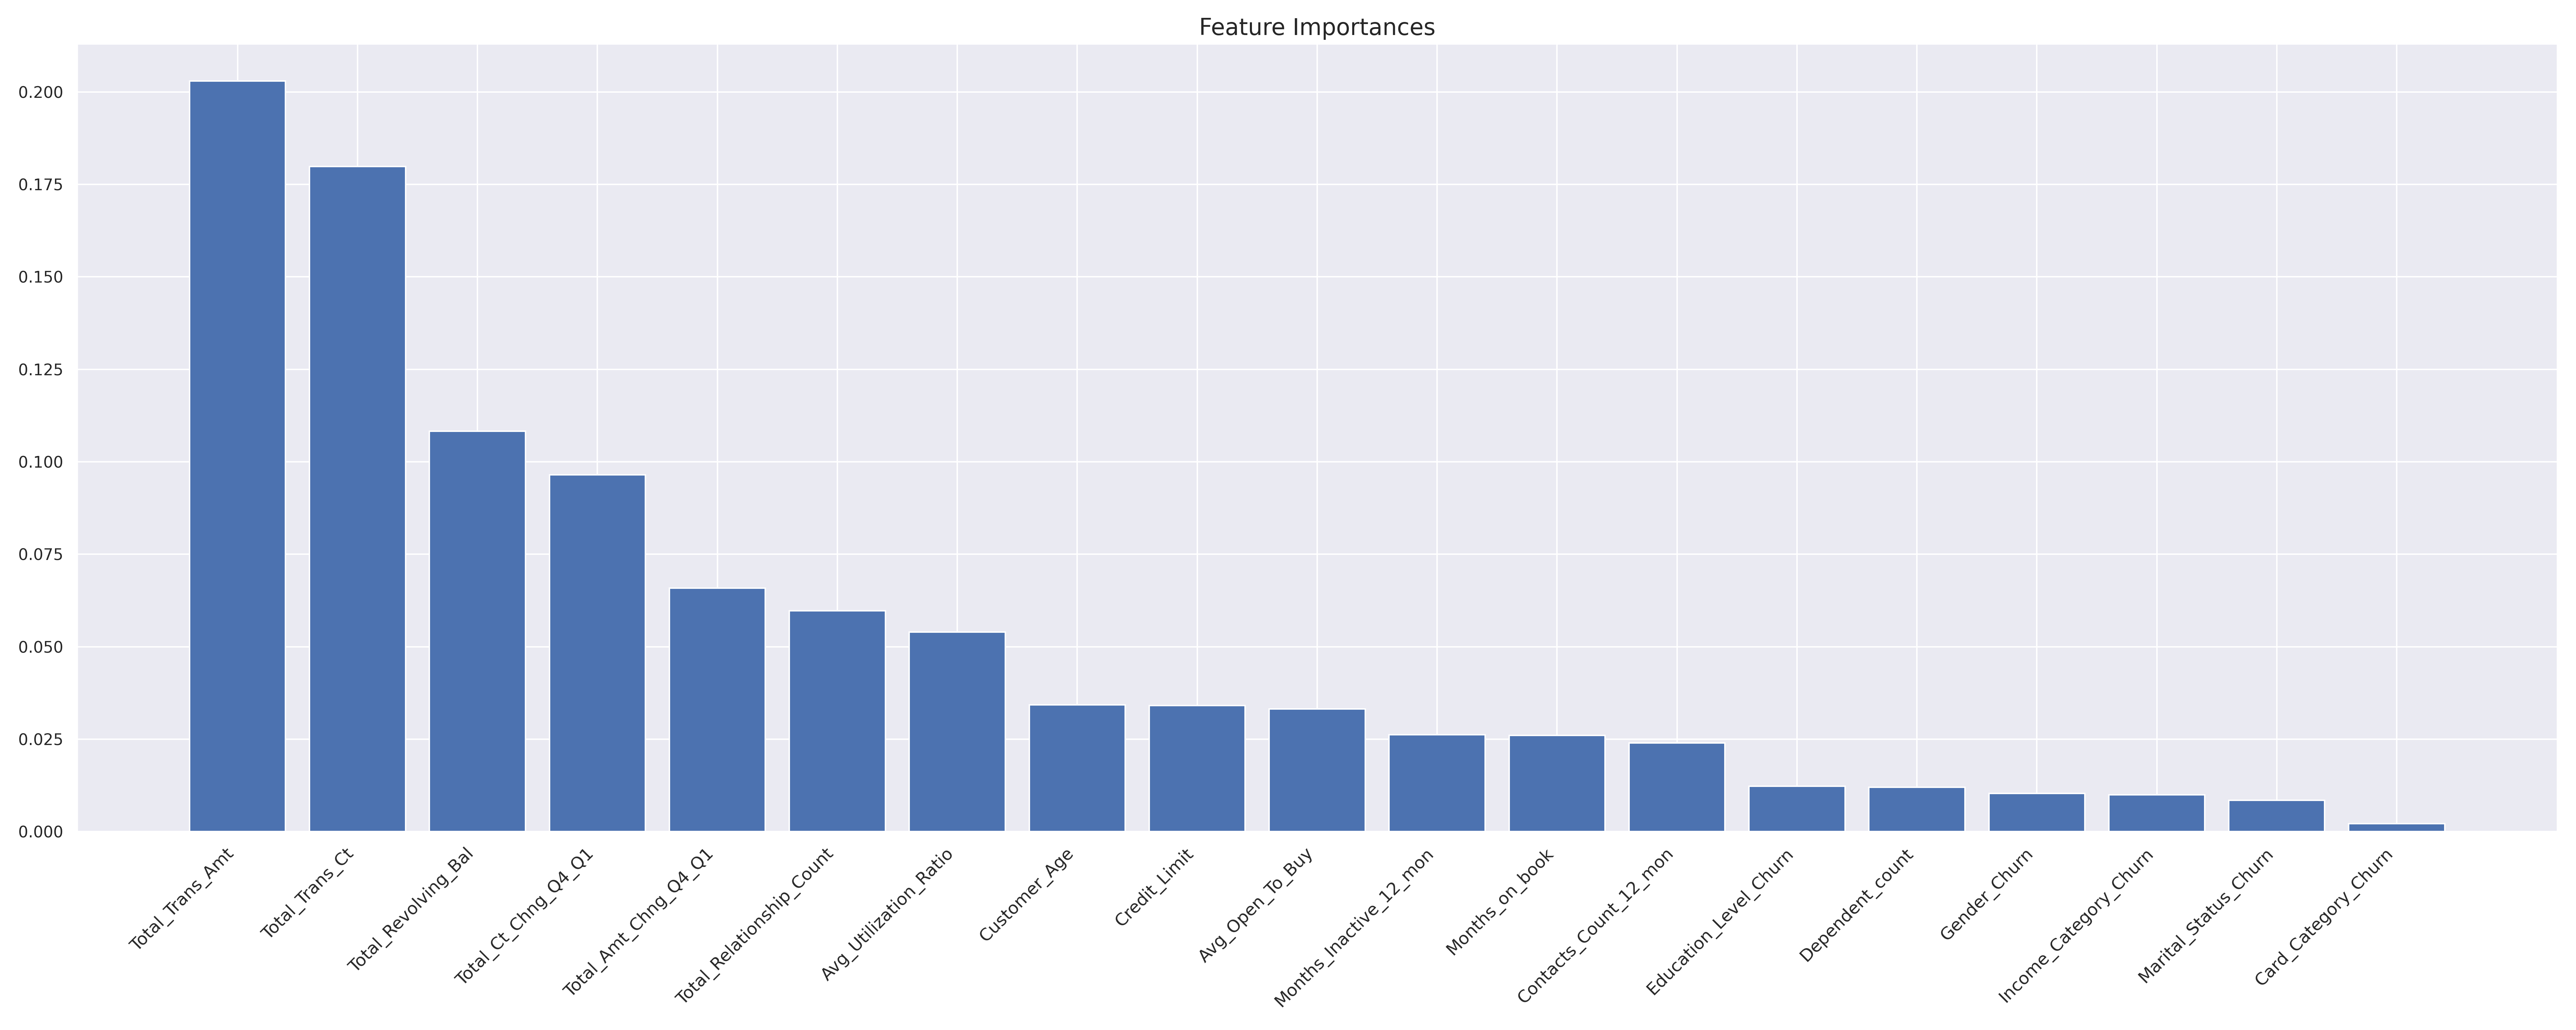

Displaying: 8_shap_summary_plot.png


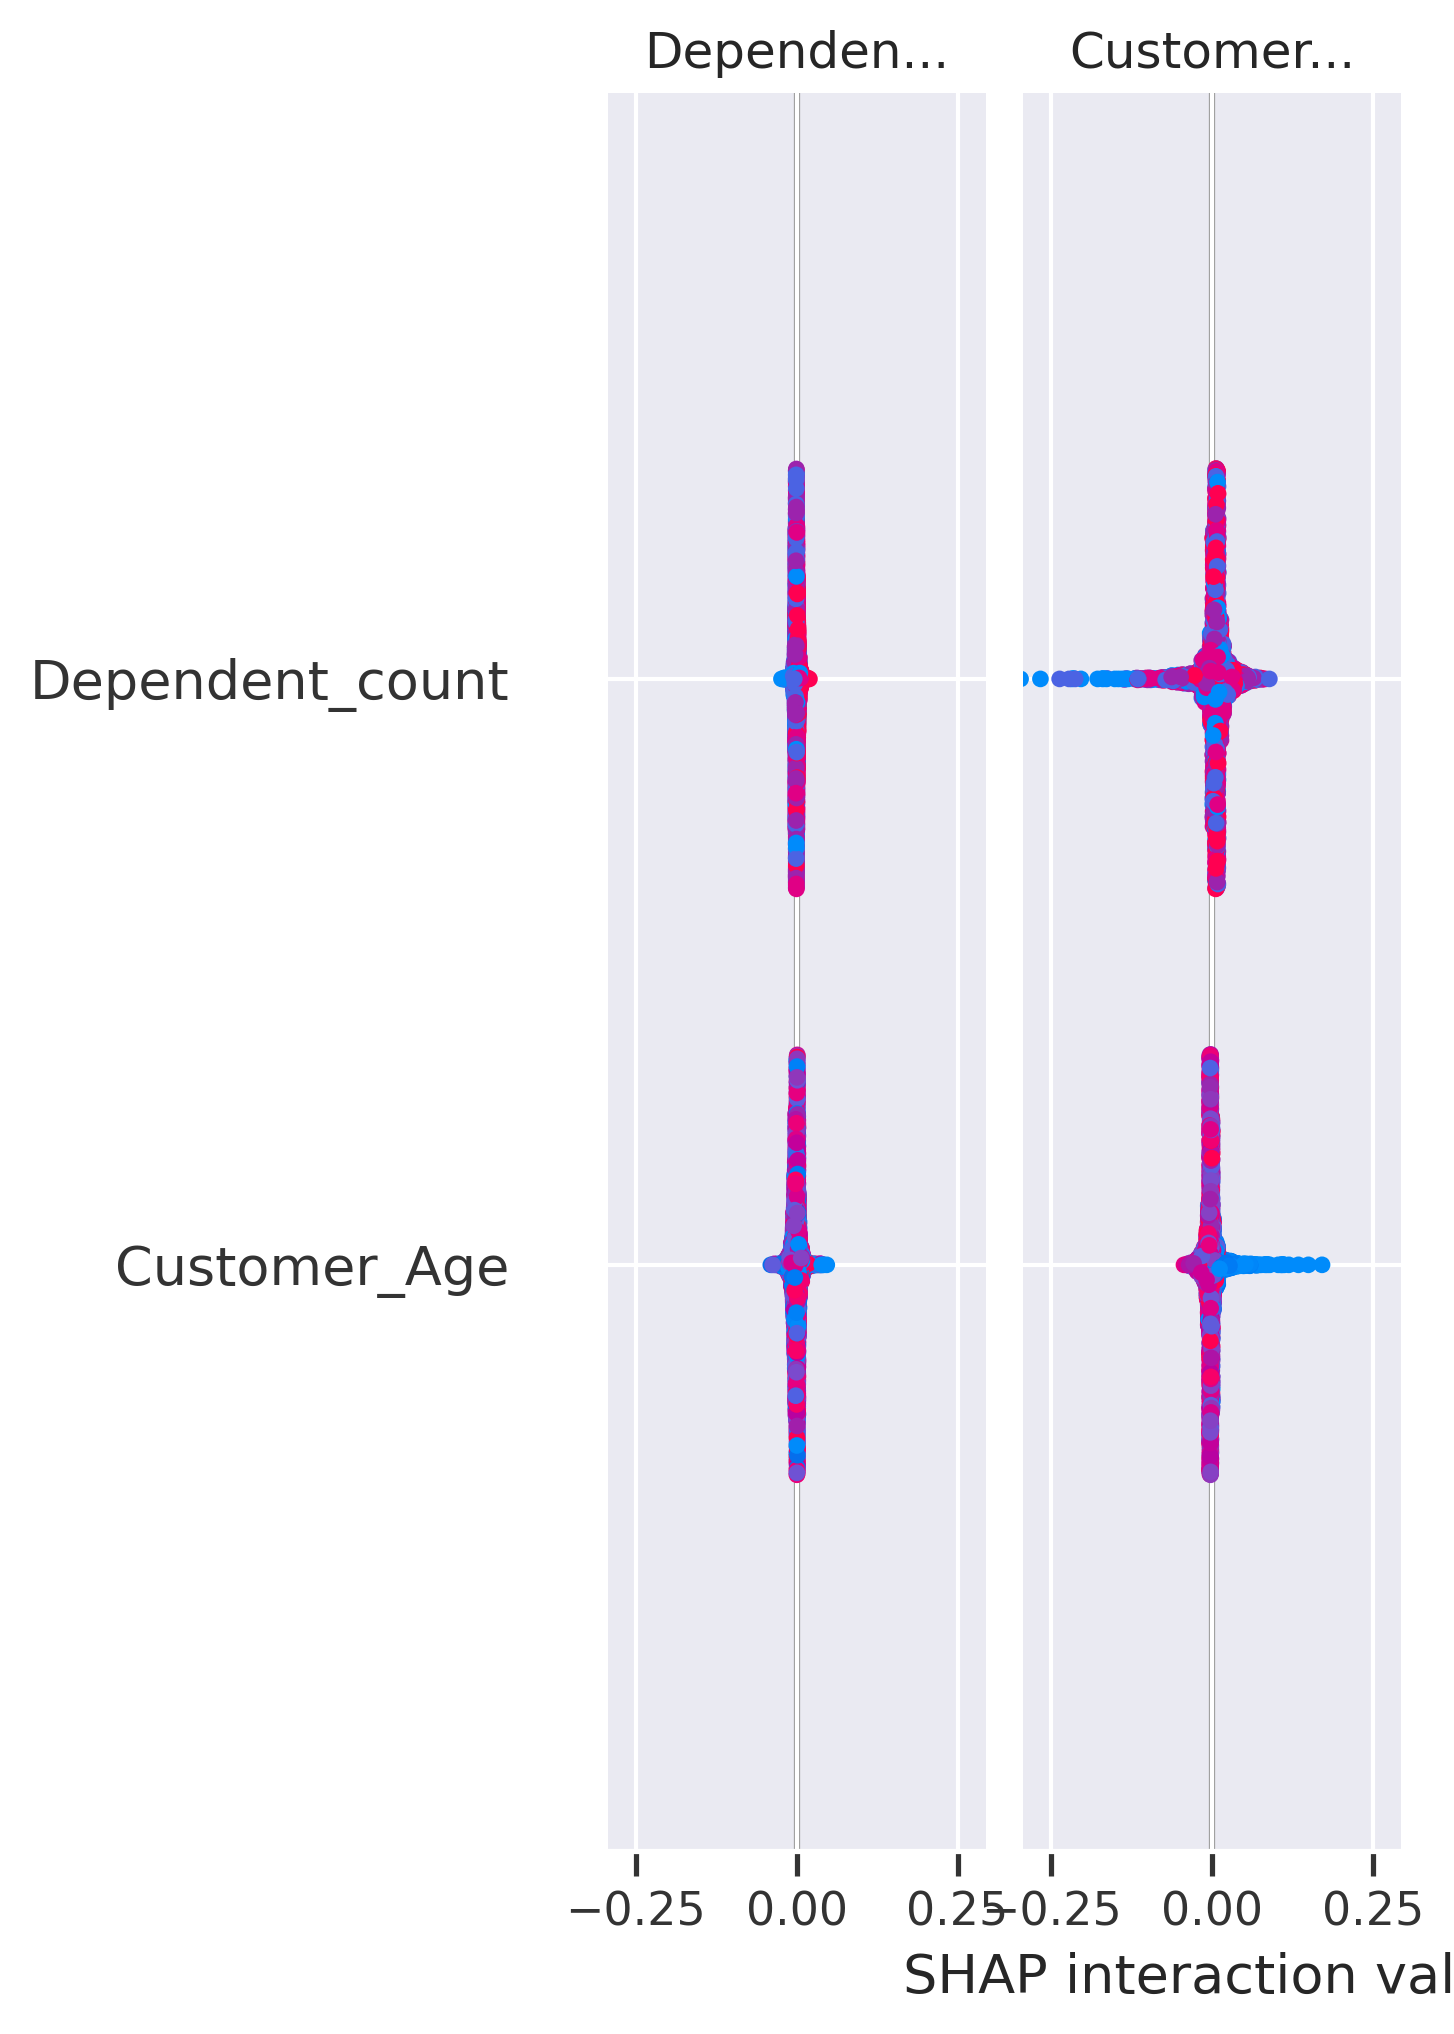

In [13]:
from IPython.display import Image, display

# Directory containing the EDA images
eda_images_path = './images/results'

for file_name in sorted(os.listdir(eda_images_path)):  # Use sorted() to order filenames
    if file_name.endswith(('.png', '.jpg', '.jpeg')):  # Check for image files
        file_path = os.path.join(eda_images_path, file_name)
        print(f"Displaying: {file_name}")
        display(Image(filename=file_path))